# Аналитика в авиакомпании

В качестве входных данных есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**Описание данных**

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:

    model — модели самолета
    flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:

    city — городах
    average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года


В рамках этой части для двух наборов данных будут выполнены следующие шаги:

    1. импортирование файлов;
    2. изучение данных в них;
    3. проверка типов данных на корректность;
    4. выборка из топ-10 городов по количеству рейсов;
    5. построение графиков: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
    6. формулировка выводов по каждому из графиков и интерпретация результата.

<h1>
	Содержание
	<span class="tocSkip"></span>
</h1>
<div class="toc">
	<ul class="toc-item">
		<li>
			<span>
				<a href="#Импортирование файлов" data-toc-modified-id="импортирование-файлов-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;
                    </span>Импортирование файлов
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Вывод" data-toc-modified-id="Вывод-1.1">
                            <span class="toc-item-num">1.1&nbsp;&nbsp;
                            </span>Вывод
                        </a>
                    </span>
                </li>
            </ul>
        </li>        
        <li>
			<span>
				<a href="#Изучение данных" data-toc-modified-id="Изучение-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>Изучение данных
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Вывод" data-toc-modified-id="Вывод-2.1">
                            <span class="toc-item-num">2.1&nbsp;&nbsp;
                            </span>Вывод
                        </a>
                    </span>
                </li>
            </ul>
        </li>       
        <li>
			<span>
				<a href="#Проверка типов данных на корректность" data-toc-modified-id="Проверка-типов-данных-на-корректность-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Проверка типов данных на корректность
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Вывод" data-toc-modified-id="Вывод-3.1">
                            <span class="toc-item-num">3.1&nbsp;&nbsp;
                            </span>Вывод
                        </a>
                    </span>
                </li>
            </ul>
        </li>       
        <li>
			<span>
				<a href="#Выборка из топ-10 городов по количеству рейсов" data-toc-modified-id="Выборка-из-топ-10-городов-по-количеству-рейсов-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Выборка из топ-10 городов по количеству рейсов
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Вывод" data-toc-modified-id="Вывод-4.1">
                            <span class="toc-item-num">4.1&nbsp;&nbsp;
                            </span>Вывод
                        </a>
                    </span>
                </li>
            </ul>
        </li>       
         <li>
			<span>
				<a href="#Построение графиков и интерпретация результата" data-toc-modified-id="Построение-графиков-и-интерпретация-результата-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;
                    </span>Построение графиков и интерпретация результата
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Вывод" data-toc-modified-id="Вывод-5.1">
                            <span class="toc-item-num">5.1&nbsp;&nbsp;
                            </span>Вывод
                        </a>
                    </span>
                </li>
            </ul>
        </li>        
        <li>
				<span>
					<a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">
						<span class="toc-item-num">6&nbsp;&nbsp;
						</span>Общий вывод
					</a>
				</span>
			</li>
		</ul>
	</div>

## Импортирование файлов 

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

pd.options.display.max_columns = 40
#игнорируем варнинги
import warnings
warnings.filterwarnings('ignore')

### Вывод

Мы импортировали файлы с результатами первого и третьего запросов с помощью функции read_csv(). 
Также были импортированы библиотеки, необходимые для выполнения проекта.

## Изучение данных

Изучим данные с помощью метода info().
Выведем первые строки таблицы методом head(), чтобы познакомиться с данными. Изучим числовые данные в столбцах с помощью describe().

In [3]:
df_list = [model_flights, city_flights]
 
for val in df_list:
    val.info()
    display(val.describe())
    display(val.head(10))
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


В датасете по первому запросу (model_flights) всего 2 колонки, 8 строк. Первый столбец типа object, второй типа int64. 
Медианное значение числа полетов (2035.625) сильно разнится со средним(795), но это вполне объяснимо, учитывая, что строк в датасете всего 8, данных мало. Максимальное число полетов - 4557, минимальное - 300.

In [4]:
#проверим данные на дубликаты
model_flights[model_flights.duplicated()]

,model,flights_amount


Дублирующихся строк нет.

In [5]:
#посмотрим на нулевые значения
pd.DataFrame(round((model_flights.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
model,0
flights_amount,0


Нулевых значений нет.

Переходим к датасету city_flights. В датасете также всего 2 колонки, первая типа object. Имеет смысл перевести ее в String, так как она содержит названия городов. Вторая колонка типа float64. Возможно, уменьшим количество цифр после запятой до 2х для наиболее удобного представления данных.
Число строк - 101.

In [6]:
#проверим данные на дубликаты
city_flights[city_flights.duplicated()]

,city,average_flights


Дублирующихся строк нет.

In [7]:
#посмотрим на нулевые значения
pd.DataFrame(round((city_flights.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
city,0
average_flights,0


Нулевых значений нет.

### Вывод

В результате предварительного анализа видим, что в датасете по первому запросу (model_flights) всего 2 колонки, 8 строк. Первый столбец типа object, второй типа int64. 
Медианное значение числа полетов (2035.625) сильно разнится со средним (795), но это вполне объяснимо, учитывая, что строк в датасете всего 8, данных мало. Максимальное число полетов - 4557, минимальное - 300.

В датасете по третьему запросу (city_flights) также всего 2 колонки, первая типа object. Имеет смысл перевести ее в String, так как она содержит названия городов. Вторая колонка типа float64. Возможно, уменьшим количество цифр после запятой до 2х для наиболее удобного представления данных. Число строк - 101.

Данные в датасетах также проверены на пустые значения и дубликаты.

## Проверка типов данных

Приведем значения в колонке city датасета city_flights к строковому типу.

In [8]:
city_flights['city'] = city_flights['city'].astype('str')

Округлим количество цифр после запятой до 2х в колонке 'average_flights' для наиболее удобного представления данных

In [9]:
city_flights['average_flights'] = city_flights['average_flights'].floordiv(0.01).div(100)
city_flights

,city,average_flights
0,Абакан,3.87
1,Анадырь,0.99
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


### Вывод

В результате шага 3 значения в колонке city датасета city_flights были приведены к строковому типу. Также в колонке 'average_flights' было округлено количество цифр после запятой до двух для наиболее удобного представления данных.


## Выборка из топ-10 городов по количеству рейсов

Сделаем groupby по городу, посчитаем количество рейсов, отсортируем в обратном порядке по количеству рейсов и возьмем 10 первых.


In [10]:
#группируем по городу, сортируем и берем первые 10
city_flights_10 = city_flights.groupby(['city']).sum().sort_values(by='average_flights', ascending=False).head(10)
#сохраняем список топ-10
a = city_flights_10.index[:10].to_list()
a

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Красноярск',
 'Екатеринбург',
 'Ростов-на-Дону',
 'Пермь',
 'Брянск',
 'Сочи',
 'Ульяновск']

### Вывод

На первых местах ожидаемо Москва и Санкт-Петербург. Новосибирск - третий после Москвы и Петербурга по числу жителей город России. Весьма неожиданно, что здесь есть Брянск и Ульяновск. С другой стороны, Брянск и Ульяновск - столицы областей, важные транспортные узлы. Также можно предположить, что у нас данные не по всем авиакомпаниям, или вообще данные только какой-то определенной авиакомпании.

## Построение графиков и интерпретация результата 

Изучим количество рейсов в зависимости от модели самолетов.

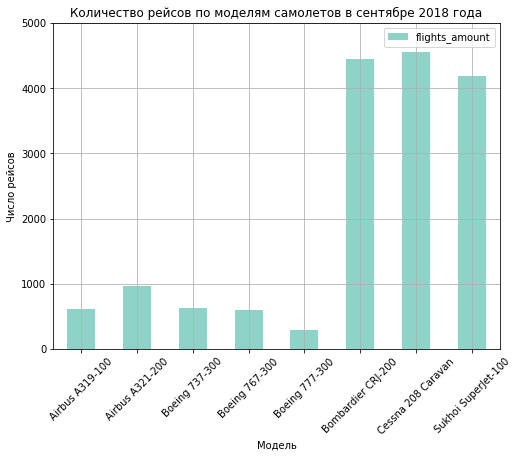

In [11]:
model_flights.plot(kind='bar',
          x='model', # столбец значений для горизонтальной оси
          y='flights_amount', # столбец значений для вертикальной оси
          style='o-', # стиль заполнения:'o'(точечный) или 'o-'(точечно-линейный)
          ylim=(0, 5000), # границы по оси Y
          figsize=(8, 6), # размеры картинки: (x_size, y_size)
          grid=True,# отображать сетку или нет
          colormap='Set3') 
plt.title('Количество рейсов по моделям самолетов в сентябре 2018 года')
plt.xlabel('Модель')
plt.ylabel('Число рейсов')
plt.xticks(rotation=45)
plt.show()

Больше всего рейсов приходится на три модели самолетов, они сильно выбиваются среди общей картины, - это Bombardier CRJ-200 (4446),Cessna 208 Caravan (4557 рейсов), Sukhoi SuperJet-100 (4185). Остальные модели самолетов выполнили до 1000 рейсов за сентябрь 2018 года.

Изучим среднее количество рейсов за день в августе 2018 года в зависимости от города.

In [12]:
#отсортируем города по количеству рейсов в порядке убывания
city_flights = city_flights.sort_values(['average_flights'], ascending=False).reset_index(drop=True)

#разделим данные на две части для более удобного представления на графике
part1 = city_flights.iloc[:51, :]

part2 = city_flights.iloc[51:, :]


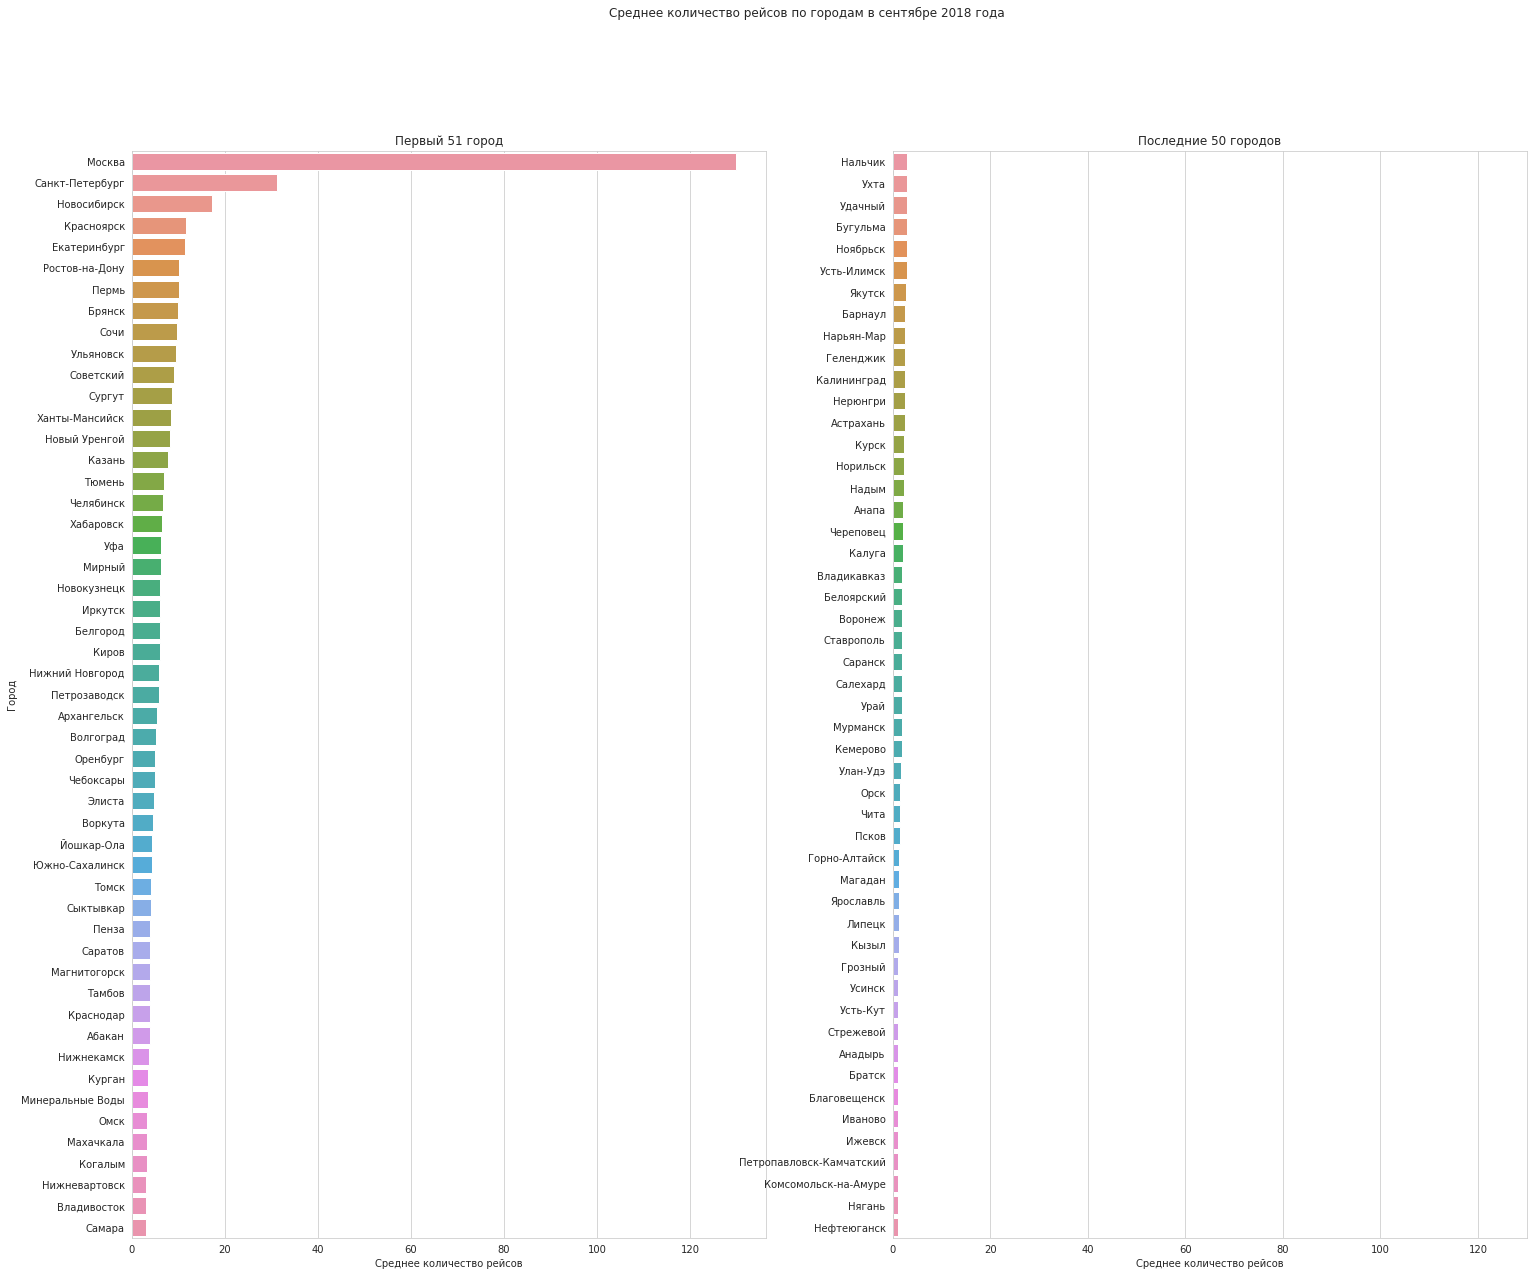

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(25,20))
fig.suptitle('Среднее количество рейсов по городам в сентябре 2018 года')
axes[0].set_title('Первый 51 город')
axes[1].set_title('Последние 50 городов')
ax1 = sns.barplot(ax=axes[0], data=part1, x='average_flights', y='city')
ax2 = sns.barplot(ax=axes[1], data=part2, x='average_flights', y='city')
ax1.set(xlabel='Среднее количество рейсов', ylabel='Город')
ax2.set(xlabel='Среднее количество рейсов', ylabel='')
sns.set_style("whitegrid")
plt.xlim(0,130)
plt.show()

Построен барплот, где города расположены по оси Y. Предварительно датасет был отсортирован по убываню числа полетов и  разделен на две группы (по 50 и 51 городу), после чего был использован сабплот с двумя колонками. В итоге диаграмма получилась не такой громоздкой.

Судя по графику, самое большое число полетов совершилось в Москву (порядка 135), в Санкт-Петербург уже значительно меньше (около 30 в день), далее идут Новосибирск(~ 15), Красноярск, Екатеринбург, Ростов-на-Дону, Пермь и Брянск (~ 10 полетов). Немного странно то, Брянск в среднем больше рейсов в день принимает в сентябре, чем Сочи. Скорее всего, это всё-таки данные по какой-то одной авиакомпании. Или же у нас в выборке пассажиропоток "по работе" больше, чем "на отдых". В любом случае, здесь явно не хватает данных для полноценного анализа.

Изучим среднее количество рейсов в день за август 2018 года для топ-10 городов

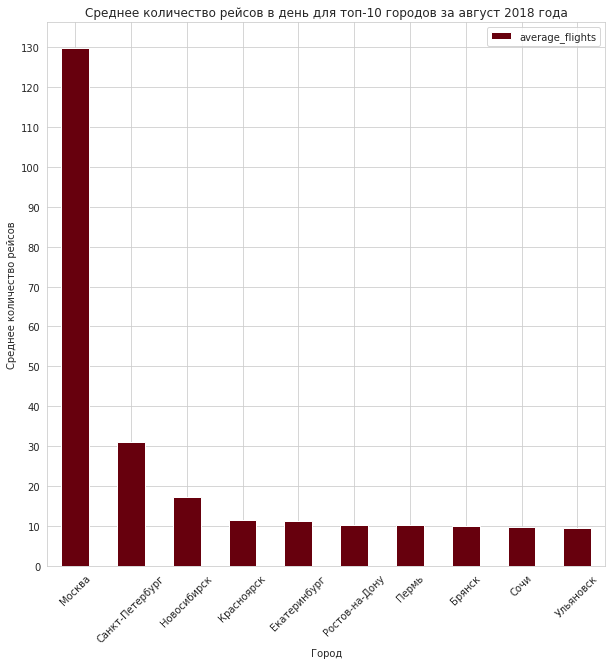

In [16]:
city_flights_10.plot(
                kind='bar', 
                title='Среднее количество рейсов в день для топ-10 городов за август 2018 года', 
                figsize=(10,10), 
                colormap='Reds_r',
                grid=True
                )
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 140, 10)) #зададим шаг по oy
plt.show()

На графике показано среднее количество рейсов в день для топ-10 городов за август 2018 года. Видим здесь Брянск и Пензу, я предполагаю, что это региональные пересадочные узлы. Брянск близко к Беларуси, возможно, оттуда удобней лететь в какие-то небольшие города. Рейсы в Ульяновск, возможно, имеют промышленный характер, так как там расположен авиационный завод, так что можно предположить, что туда совершаются регулярные грузоперевозки.

### Вывод

На данном этапе были построены графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов. 

1. Изучено количество рейсов в зависимости от модели самолетов за сентябрь 2018 года. Больше всего рейсов приходится на три модели самолетов, они сильно выбиваются среди общей картины, - это Bombardier CRJ-200 (4446),Cessna 208 Caravan (4557 рейсов), Sukhoi SuperJet-100 (4185). Остальные модели самолетов выполнили менее 1000 рейсов за сентябрь 2018 года.
 
2. Изучено среднее количество рейсов за день в августе 2018 года в зависимости от города. Построен барплот, где города расположены по оси Y. Предварительно датасет был отсортирован по убываню числа полетов и  разделен на две группы (по 50 и 51 городу), после чего был использован сабплот с двумя колонками. В итоге диаграмма получилась не такой громоздкой. 
    Судя по графику, самое большое число полетов совершилось в Москву (порядка 135), в Санкт-Петербург уже значительно меньше (около 30 в день), далее идут Новосибирск(~ 15), Красноярск, Екатеринбург, Ростов-на-Дону, Пермь и Брянск (~ 10 полетов). Немного странно то, Брянск в среднем больше рейсов в день принимает в сентябре, чем Сочи. Скорее всего, это всё-таки данные по какой-то одной авиакомпании. Или же у нас в выборке пассажиропоток "по работе" больше, чем "на отдых". В любом случае, здесь явно не хватает данных для полноценного анализа.
    
3. Изучено среднее количество рейсов в день за август 2018 года для топ-10 городов. Сильно выбивается Москва по количеству рейсов, но это объяснимо, тк она является столицей, туда выполняются как пассажирские потоки, так и грузовые. Для городов с 4 по 10 места среднее количество полетов в день практически на одном уровне. Видим на графике Брянск и Пензу, предполагаю, что это региональные пересадочные узлы. Брянск близко к Беларуси, возможно, оттуда удобней лететь в какие-то небольшие города. Рейсы в Ульяновск, возможно, имеют промышленный характер, так как там расположен авиационный завод, так что можно предположить, что туда совершаются регулярные грузоперевозки.

## Общий вывод

В данном проекте была выполнена аналитика в авиакомпании.
В качестве входных данных представлены файлы, в которых содержатся данные о моделях самолетов и количестве рейсов для каждой модели самолетов в сентябре 2018 года, а также данные о городах и среднем количестве рейсов, прибывающих в эти города за день в августе 2018 года.

Сначала были импортированы файлы с результатами первого и третьего запросов с помощью функции read_csv(). 
Также были импортированы библиотеки, необходимые для выполнения проекта.

Далее данные были изучены с помощью метода info(). Выведены первые строки таблицы методом head(), чтобы познакомиться с данными. 
Изучены числовые данные в столбцах с помощью describe().

В датасете по первому запросу (model_flights) всего 2 колонки, 8 строк. Первый столбец типа object, второй типа int64. 
Медианное значение числа полетов (2035.625) сильно разнится со средним (795), но это вполне объяснимо, учитывая, что строк в датасете всего 8, данных мало. Максимальное число полетов - 4557, минимальное - 300.
В датасете по третьему запросу (city_flights) также всего 2 колонки, первая типа object. Имеет смысл перевести ее в String, так как она содержит названия городов. Вторая колонка типа float64. Возможно, уменьшим количество цифр после запятой до 2х для наиболее удобного представления данных. Число строк - 101.
Данные в датасетах также проверены на пустые значения и дубликаты.

Значения в колонке city датасета city_flights были приведены к строковому типу. Также в колонке 'average_flights' было округлено количество цифр после запятой до двух для наиболее удобного представления данных.

Далее была сделана выборка из топ-10 городов по количеству рейсов. На первых местах ожидаемо Москва и Санкт-Петербург. Новосибирск - третий после Москвы и Петербурга по числу жителей город России. Весьма неожиданно, что здесь есть Брянск и Ульяновск. С другой стороны, Брянск и Ульяновск - столицы областей, важные транспортные узлы. Также можно предположить, что у нас данные не по всем авиакомпаниям, или вообще данные только какой-то определенной авиакомпании.

Для более детального анализа были построены графики:

1. Изучено количество рейсов в зависимости от модели самолетов за сентябрь 2018 года. Больше всего рейсов приходится на три модели самолетов, они сильно выбиваются среди общей картины, - это Bombardier CRJ-200 (4446),Cessna 208 Caravan (4557 рейсов), Sukhoi SuperJet-100 (4185). Остальные модели самолетов выполнили менее 1000 рейсов за сентябрь 2018 года.
    
2. Изучено среднее количество рейсов за день в августе 2018 года в зависимости от города. Построен барплот, где города расположены по оси Y. Предварительно датасет был отсортирован по убываню числа полетов и  разделен на две группы (по 50 и 51 городу), после чего был использован сабплот с двумя колонками. В итоге диаграмма получилась не такой громоздкой. 
    Судя по графику, самое большое число полетов совершилось в Москву (порядка 135), в Санкт-Петербург уже значительно меньше (около 30 в день), далее идут Новосибирск(~ 15), Красноярск, Екатеринбург, Ростов-на-Дону, Пермь и Брянск (~ 10 полетов). Немного странно то, Брянск в среднем больше рейсов в день принимает в сентябре, чем Сочи. Скорее всего, это всё-таки данные по какой-то одной авиакомпании. Или же у нас в выборке пассажиропоток "по работе" больше, чем "на отдых". В любом случае, здесь явно не хватает данных для полноценного анализа.
    
3. Изучено среднее количество рейсов в день за август 2018 года для топ-10 городов. Сильно выбивается Москва по количеству рейсов, но это объяснимо, тк она является столицей, туда выполняются как пассажирские потоки, так и грузовые. Для городов с 4 по 10 места среднее количество полетов в день практически на одном уровне. Видим на графике Брянск и Пензу, предполагаю, что это региональные пересадочные узлы. Брянск близко к Беларуси, возможно, оттуда удобней лететь в какие-то небольшие города. Рейсы в Ульяновск, возможно, имеют промышленный характер, так как там расположен авиационный завод, так что можно предположить, что туда совершаются регулярные грузоперевозки.